In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from itertools import product

## Definición de funciones

In [2]:
plt.style.use('classic')

In [4]:
def fourier(t,x):

    y = fft(x)

    n_input = x.size
    n_output = y.size

    PSD = np.abs(y) / n_input
    fase = np.angle(y) / n_input * 180 / np.pi

    frec = 1 / ( t.max() - t.min() ) * np.arange(0,n_output)

    return frec, PSD, fase

In [5]:
def fourier_discreta(t,x):

    n = x.size
    w = np.ones((n,n),dtype=np.complex128)
    
    wn = np.exp(-2j * np.pi / n)

    for i,j in product(range(1,n),range(1,n)):

        w[i,j] = wn**(i*j)
    
    y = w @ x

    n_samples = x.size
    PSD = np.abs(y) / n_samples
    dt = (t.max()-t.min()) / n_samples
    fase = np.angle(y) / n_samples * 180 / np.pi

    frec = 1 / (dt*n_samples) * np.arange(0,n_samples)

    return frec, PSD, fase

In [6]:
indice = lambda arr, value: int(np.floor(arr.size / ( arr.max() - arr.min() ) * value))

def max_en_I(PSD,frec,i_min,i_max):

    a = PSD[indice(frec,i_min):indice(frec,i_max)].max()
    I = np.where(PSD == a)[0][0]
    f_max = frec[I]

    return f_max

## Señal, DATOS 04571 arbitraria 1

In [7]:
t, x = np.loadtxt(fname='das04571.csv', delimiter=',',skiprows=2,usecols=(0,1),unpack=True)

In [8]:
frec, PSD, fase = fourier(t,x)
frecD, PSDD, faseD = fourier_discreta(t,x)

f1 = max_en_I(PSD,frec,500,2000)
f2 = max_en_I(PSD,frec,2000,4000)
f3 = max_en_I(PSD,frec,4500,5500)

f = [f1,f2,f3]

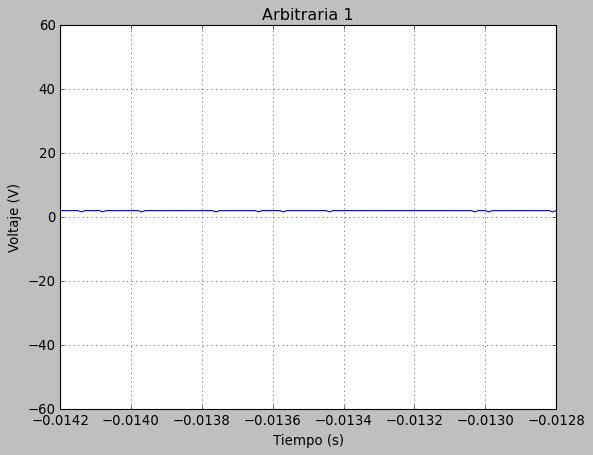

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t,x)
ax.set_xlim(-0.0142,-0.0128)

ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Voltaje (V)')

ax.set_title('Arbitraria 1')
ax.grid()

plt.show()

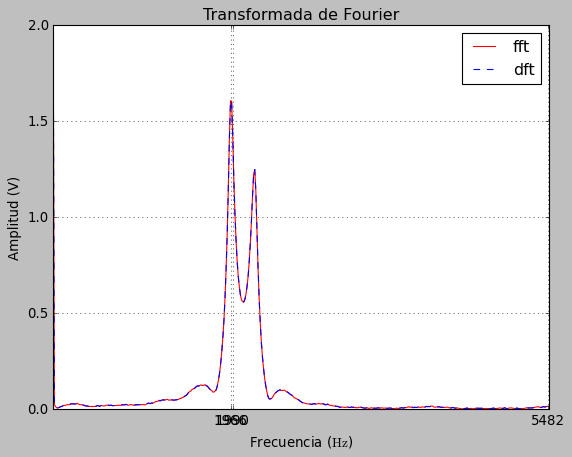

In [10]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(frec,PSD,color='red',label='fft')
ax.plot(frecD,PSDD,label='dft',linestyle='--')

ax.set_xlim(0,5500)
ax.set_xticks(f)

ax.set_xlabel('Frecuencia ($\mathrm{Hz}$)')
ax.set_ylabel('Amplitud (V)')
ax.set_title('Transformada de Fourier')

ax.grid()
ax.legend()

plt.show()

## Señal, señal datos111, arbitraria 2

In [11]:
t, x = np.loadtxt(fname='datos111.csv', delimiter=',',skiprows=2,usecols=(0,1),unpack=True)
frec, PSD, fase = fourier(t,x)
frecD, PSDD, faseD = fourier_discreta(t,x)

In [12]:
f1 = max_en_I(PSD,frec,500,2000)
f2 = max_en_I(PSD,frec,1600,2600)
f3 = max_en_I(PSD,frec,2000,4000)
f4 = max_en_I(PSD,frec,4000,5000)
f5 = max_en_I(PSD,frec,5000,5500)
f6 = max_en_I(PSD,frec,5900,6100)

f = [f1,f2,f3,f4,f5,f6]
f

[500.5309137506189,
 2005.1756727692477,
 2005.1756727692477,
 4004.247310004951,
 5002.257119739417,
 6006.370965007427]

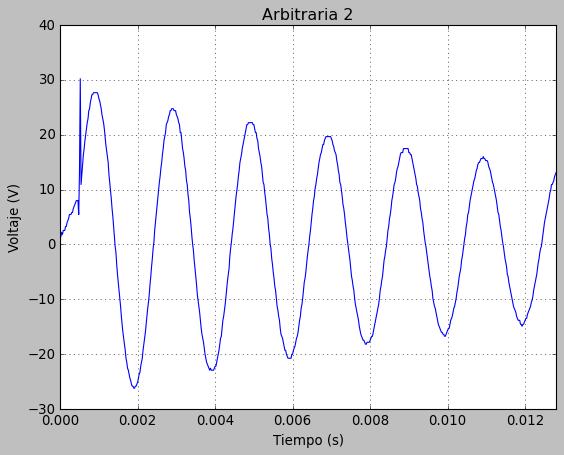

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t,x)
ax.set_xlim(0,0.0128)

ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Voltaje (V)')

ax.set_title('Arbitraria 2')
ax.grid()

plt.show()

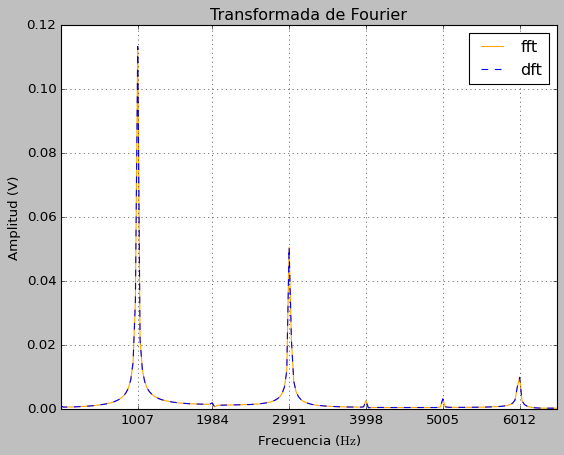

In [ ]:
#Amplitud
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(frec,PSD,color='orange',label='fft')
ax.plot(frecD,PSDD,label='dft',linestyle='--')

ax.set_xlim(0,6500)
ax.set_xticks(f)
ax.grid()

ax.set_xlabel('Frecuencia ($\mathrm{Hz}$)')
ax.set_ylabel('Amplitud (V)')
ax.set_title('Transformada de Fourier')

ax.legend()

plt.show()

## Señal cuadrada

In [ ]:
t, x = np.loadtxt(fname='Señal_cuadrada.csv', delimiter=',',skiprows=2,usecols=(0,1),unpack=True)
frec, PSD, fase = fourier(t,x)
frecD, PSDD, faseD = fourier_discreta(t,x)

f1 = max_en_I(PSD,frec,500,2000)
f2 = max_en_I(PSD,frec,2000,4000)
f3 = max_en_I(PSD,frec,4000,6000)

f = [f1,f2,f3]

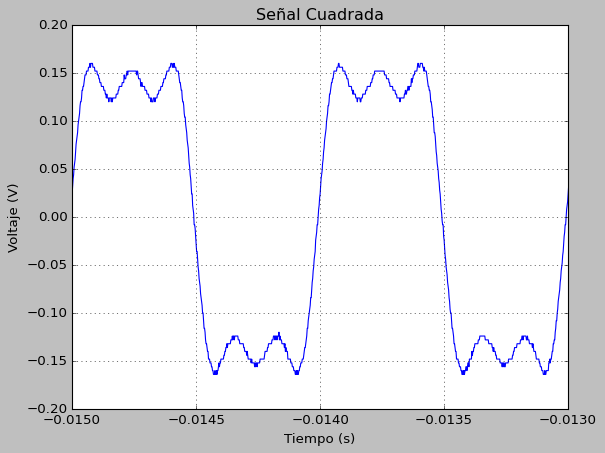

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t,x)
ax.set_xlim(-0.015,-0.013)

ax.grid()

ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Voltaje (V)')

ax.set_title('Señal Cuadrada')

plt.show()

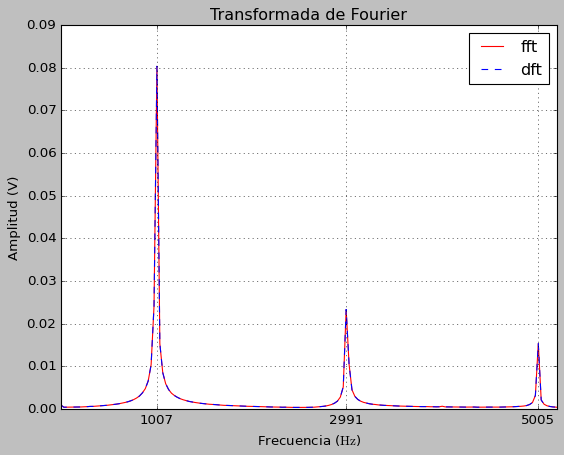

In [ ]:
#Amplitud
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(frec,PSD,color='red',label='fft')
ax.plot(frecD,PSDD,label='dft',linestyle='--')
ax.set_xlim(0,5200)
ax.set_xticks(f)

ax.set_xlabel('Frecuencia ($\mathrm{Hz}$)')
ax.set_ylabel('Amplitud (V)')
ax.set_title('Transformada de Fourier')

ax.grid()
ax.legend()

plt.show()

## Desfase 180

In [ ]:
t, x = np.loadtxt(fname='Desfase180.csv', delimiter=',',skiprows=2,usecols=(0,1),unpack=True)

In [ ]:
x.size

16384

In [ ]:

frec, PSD, fase = fourier(t,x)
frecD,PSD, faseD=fourier_discreta(t,x)

f1 = max_en_I(PSD,frec,500,2000)
f2 = max_en_I(PSD,frec,2000,4000)
f3 = max_en_I(PSD,frec,4500,5500)

f = [f1,f2,f3]

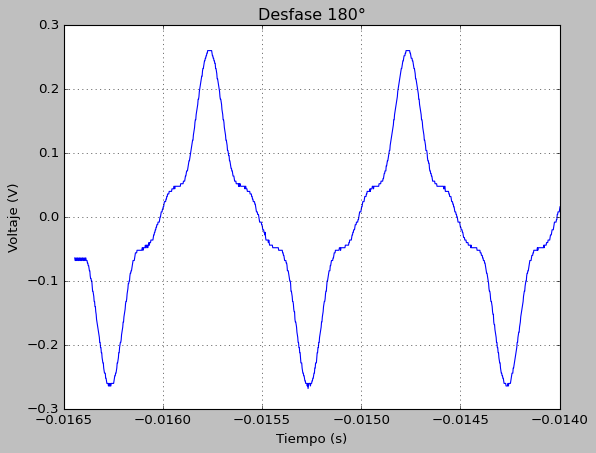

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t,x)
ax.set_xlim(-0.0165,-0.014)

ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Voltaje (V)')

ax.set_title('Desfase 180°')
ax.grid()

plt.show()

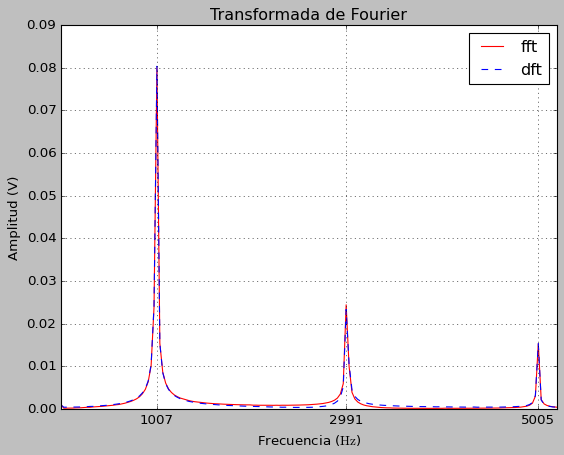

In [ ]:
#Amplitud
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(frec,PSD,label='fft',color='red')
ax.plot(frecD,PSDD,label='dft',linestyle='--')

ax.set_xlim(0,5200)
ax.set_xticks(f)

ax.set_xlabel('Frecuencia ($\mathrm{Hz}$)')
ax.set_ylabel('Amplitud (V)')
ax.set_title('Transformada de Fourier')

ax.grid()
ax.legend()

plt.show()